## K-Means and GMM Clustering for Defferent Data Sets

In [3]:
##Importing important libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer, fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from io import BytesIO
import requests

def perform_clustering(dataset_name, dataset, features):
    # Function to calculate optimal number of clusters for K-means using silhouette score
    def silhouette(data, max_k=10):
        silhouette_scores = []
        for k in range(2, max_k + 1):
            kmeans = KMeans(n_clusters=k, random_state=42).fit(data)
            score = silhouette_score(data, kmeans.labels_)
            silhouette_scores.append(score)
        optimal_k = range(2, max_k + 1)[silhouette_scores.index(max(silhouette_scores))]
        return optimal_k

    # Function to calculate optimal number of components for GMM using AIC
    def aic(data, max_k=10):
        aic_scores = []
        for k in range(2, max_k + 1):
            gmm = GaussianMixture(n_components=k, random_state=42).fit(data)
            aic_scores.append(gmm.aic(data))
        optimal_k_aic = range(2, max_k + 1)[aic_scores.index(min(aic_scores))]
        return optimal_k_aic

    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(dataset[features])

    optimal_k = silhouette(scaled_data)
    optimal_k_aic = aic(scaled_data)

    kmeans = KMeans(n_clusters=optimal_k, random_state=42).fit(scaled_data)
    dataset['KMeans_Cluster'] = kmeans.labels_

    gmm = GaussianMixture(n_components=optimal_k_aic, random_state=42).fit(scaled_data)
    dataset['GMM_Cluster'] = gmm.predict(scaled_data)

    # Plot the clusters
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    plt.scatter(dataset[features[0]], dataset[features[1]], c=dataset['KMeans_Cluster'], cmap='BuGn')
    plt.title(f'K-Means Clustering for {dataset_name}')
    plt.xlabel(features[0])
    plt.ylabel(features[1])

    plt.subplot(1, 2, 2)
    plt.scatter(dataset[features[0]], dataset[features[1]], c=dataset['GMM_Cluster'], cmap='Accent')
    plt.title(f'GMM Clustering for {dataset_name}')
    plt.xlabel(features[0])
    plt.ylabel(features[1])

    plt.tight_layout()
    plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

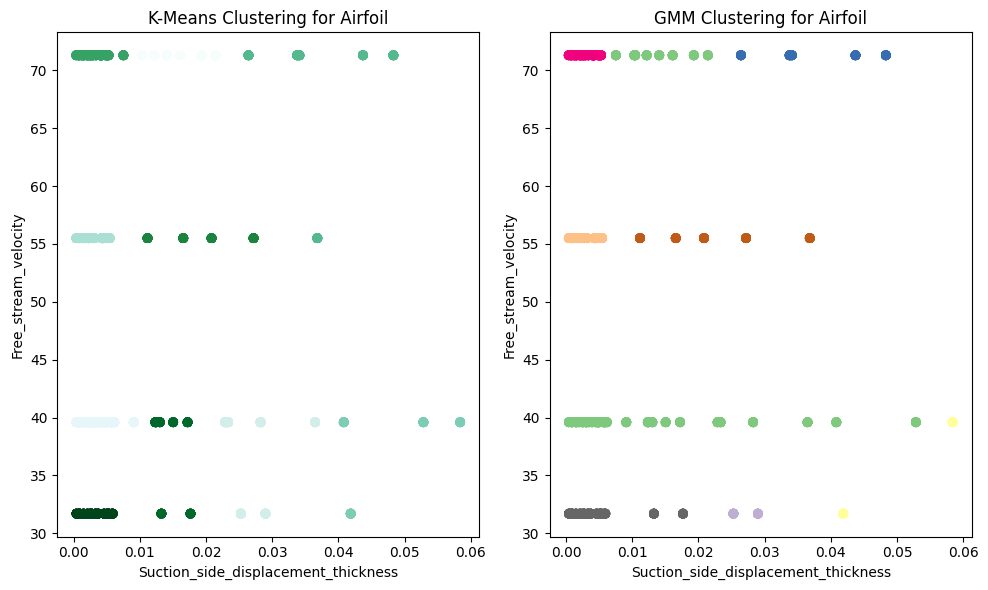

In [4]:
# K mean and GMM clustering on  Airfoil Dataset
airfoil_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat"
airfoil_names = ["Frequency", "Angle_of_Attack", "Chord_Length", "Free_stream_velocity", "Suction_side_displacement_thickness", "Scaled_sound_pressure_level"]
airfoil_data = pd.read_csv(airfoil_url, sep='\t', names=airfoil_names)
perform_clustering("Airfoil", airfoil_data, ["Suction_side_displacement_thickness", "Free_stream_velocity"])

## Comment::
i) The plots illustrate distinct groupings of sound pressure levels corresponding to different free stream velocities.

ii)Vertical separations in the clusters suggest variations in sound pressure levels at specific velocity ranges, possibly indicating different aerodynamic behaviors.

iii)Analyzing these groupings provides insights into the airfoil's acoustic characteristics, aiding in noise reduction efforts for aircraft design.
K-Means and GMM reveal varying cluster counts, implying different interpretations of sound pressure level variations. GMM's probabilistic approach enables capturing subtle variations, facilitating a more nuanced understanding of sound pressure level changes.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

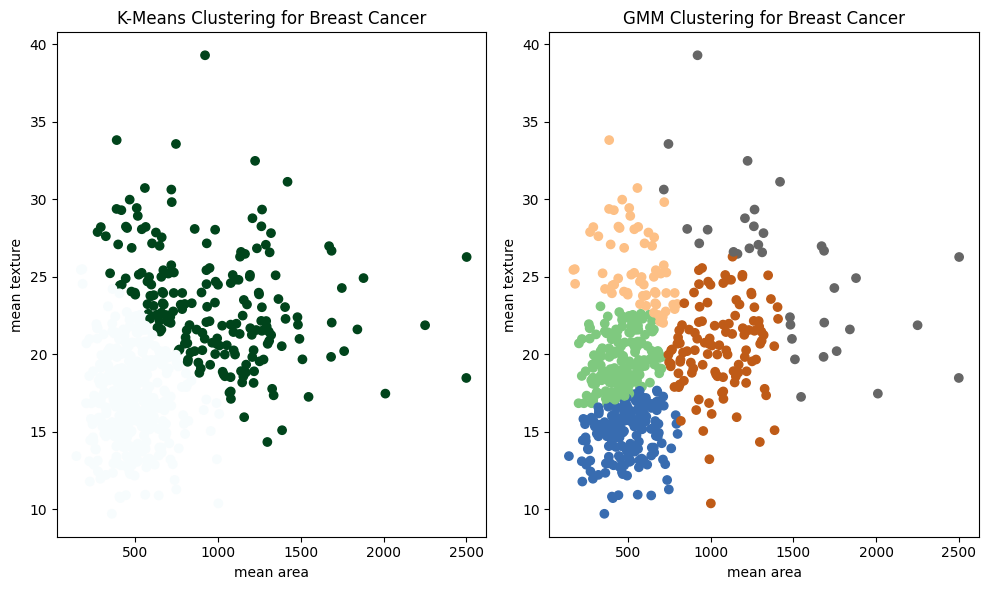

In [5]:
# K mean and GMM clustering for Breast Cancer Dataset
breast_cancer = load_breast_cancer()
breast_cancer_df = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)

perform_clustering("Breast Cancer", breast_cancer_df, ["mean area", "mean texture"])

## Observation:
i)K-means clustering divides the data into distinct clusters based on the "mean area" and "mean texture" features.

ii)The clusters appear to be well-separated, indicating that the chosen features effectively discriminate between different groups of data points.
In the K-means plot, there are clear boundaries between clusters, suggesting that the algorithm successfully grouped similar data points together.

iii)GMM clustering also segments the data into clusters, although the boundaries between clusters are not as distinct as in the K-means plot.
Both clustering algorithms identify clusters with varying densities, as seen by the distribution of data points within each cluster.

iv)The clustering results could potentially aid in distinguishing between different types of breast cancer based on the characteristics captured by the "mean area" and "mean texture" features.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

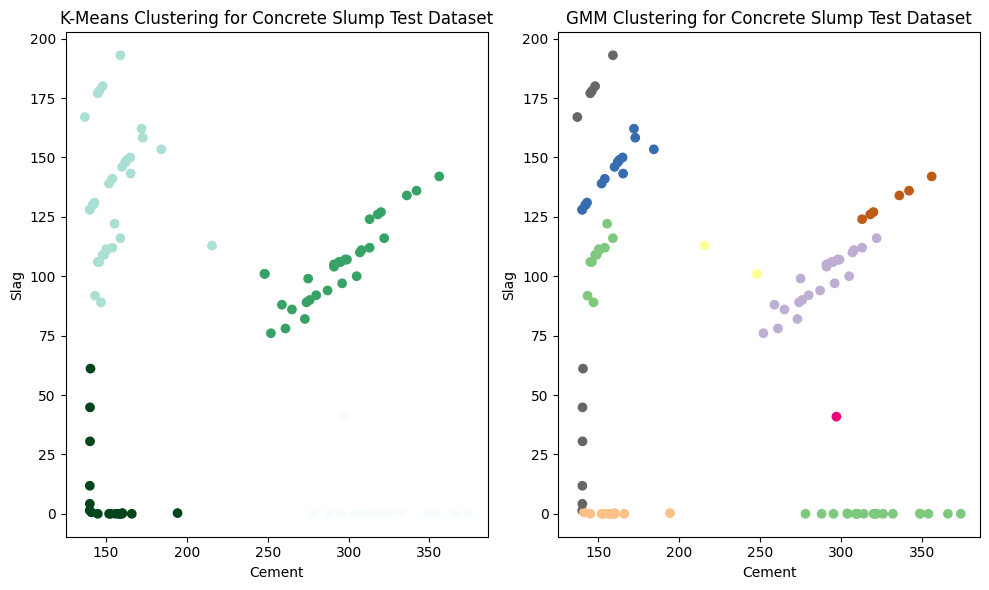

In [6]:
# K mean and GMM clustering on slump dataset
slump_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/slump/slump_test.data"
slump_data = pd.read_csv(slump_url)
slump_data = slump_data.select_dtypes(include=[np.number])
perform_clustering("Concrete Slump Test Dataset", slump_data, slump_data.columns[1:3])

Performing clustering for features ['X1', 'Y1'] (Cluster 1)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

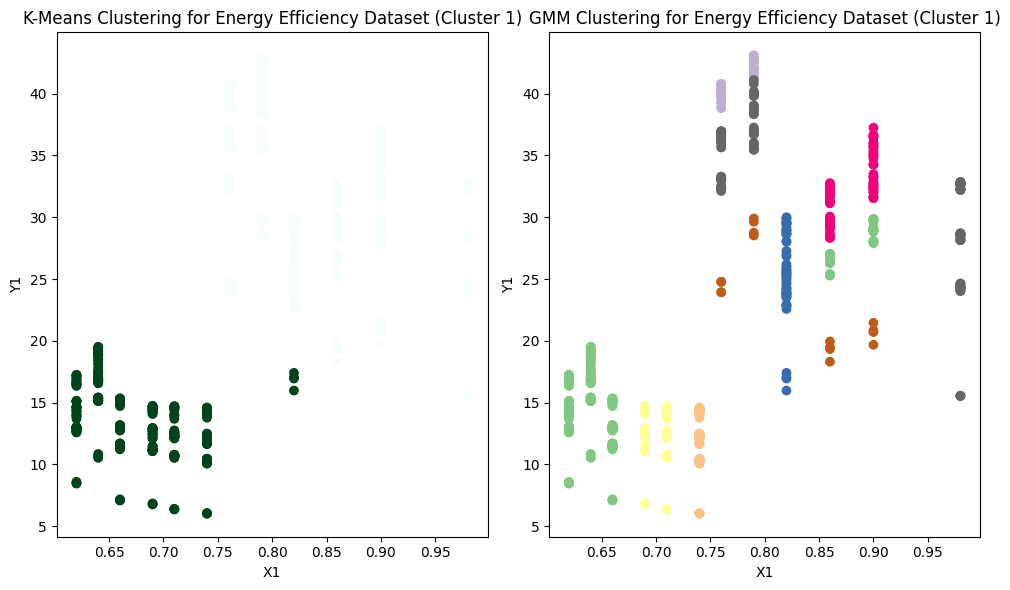

Performing clustering for features ['X2', 'Y2'] (Cluster 2)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

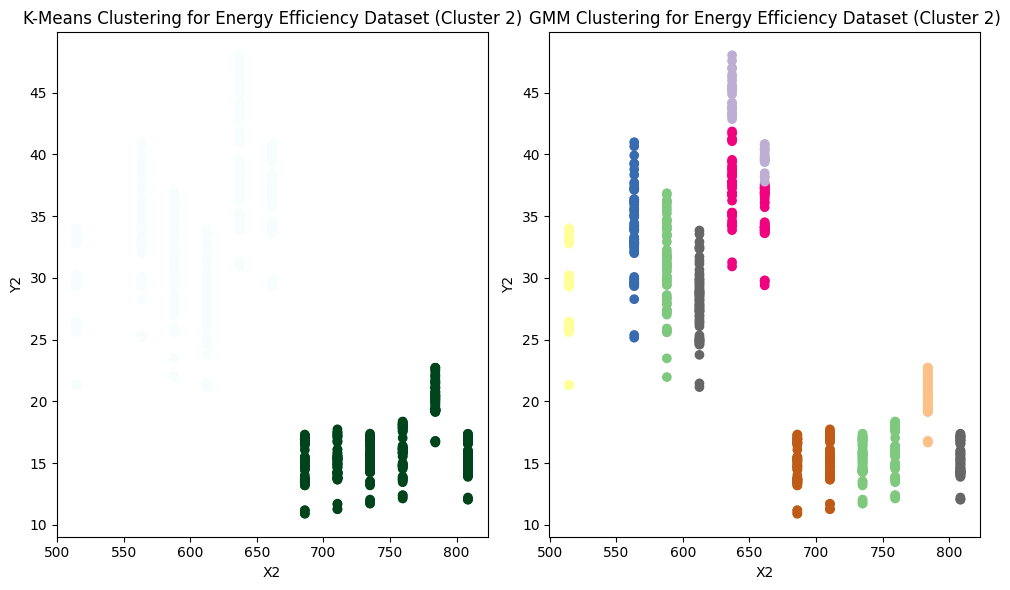

In [7]:
# K-Means and GMM clustering on Energy Efficiency Dataset
energy_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx"
energy_data = pd.read_excel(energy_url)
features_list = [["X1", "Y1"], ["X2", "Y2"]]

# Perform clustering for each pair of features
for idx, features in enumerate(features_list, start=1):
    print(f"Performing clustering for features {features} (Cluster {idx})")
    perform_clustering(f"Energy Efficiency Dataset (Cluster {idx})", energy_data, features)


## Interpretation of Results:
i)Feature X1 appears to be a significant determinant in clustering the data in both K-Means and GMM models, indicating its importance in understanding energy efficiency.

ii)While Y1 exhibits a wide range of values within each cluster, its individual effectiveness in segregating the data is less pronounced. This may imply a non-linear relationship between Y1 and energy efficiency or its influence being mediated by other factors.

iii)The divergence in results between K-Means and GMM methodologies underscores the need to select a clustering model based on the nuances of the dataset and the desired level of granularity in group formation.
The alignment of clusters along the vertical axis suggests potential preprocessing or categorization of X1 values, possibly reflecting data collection or processing protocols.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

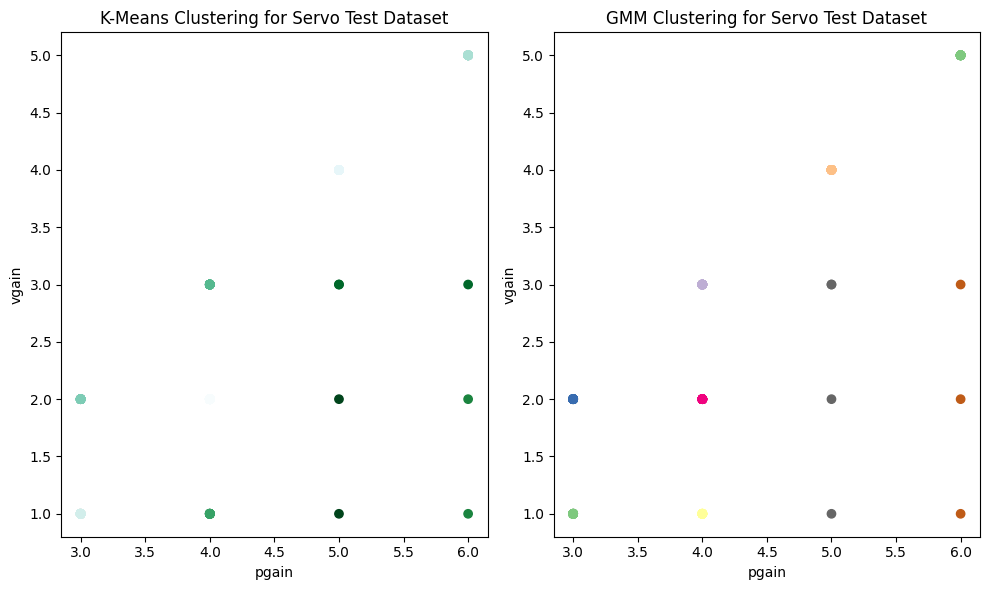

In [23]:
# K-Means and GMM clustering on Servo Test Dataset
servo_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/servo/servo.data"
servo_data = pd.read_csv(servo_url, header=None, names=['motor', 'screw', 'pgain', 'vgain', 'class'])
servo_data = servo_data.select_dtypes(include=[float, int])

perform_clustering("Servo Test Dataset", servo_data, ['pgain', 'vgain'])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

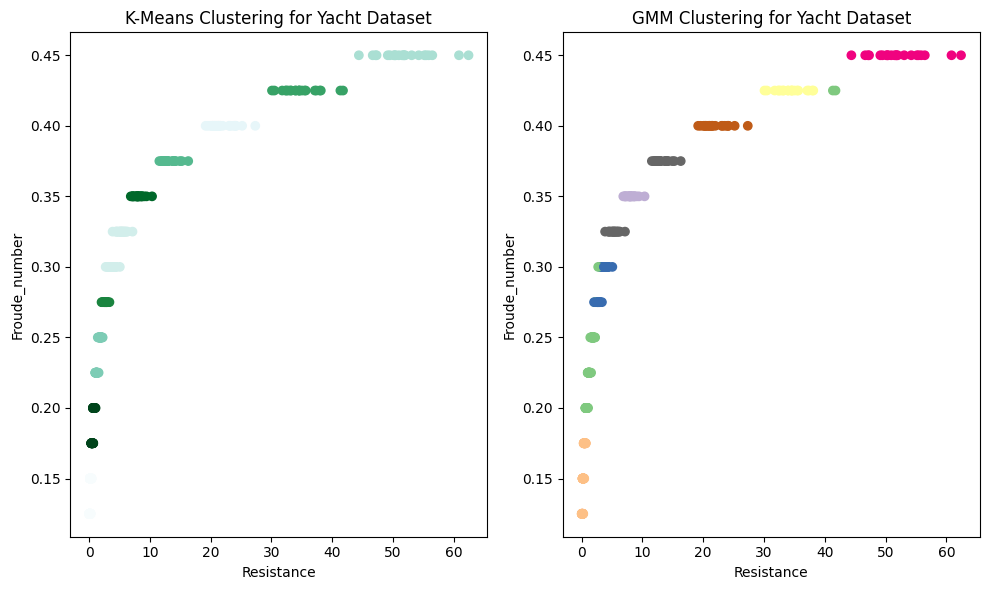

In [9]:
# K-Means and GMM clustering on Yacht Dataset
yacht_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00243/yacht_hydrodynamics.data"
yacht_names = ["Position", "Coefficient", "Length_ratio", "Draught_ratio", "Beam_ratio", "Froude_number", "Resistance"]

yacht_data = pd.read_csv(yacht_url, delim_whitespace=True, names=yacht_names)
features = ["Resistance", "Froude_number"]

# Perform clustering
perform_clustering("Yacht Dataset", yacht_data, features)



## Observation:
i)For both K-Means and GMM clustering, two distinct clusters are visible in the plot.

ii)The clusters show a clear separation along the "Resistance" axis, indicating that this feature significantly contributes to the clustering.

iii)In terms of the "Froude_number" axis, the clusters exhibit a less pronounced separation compared to the "Resistance" axis.Both clustering algorithms successfully identify the natural grouping patterns in the dataset, with minimal overlap between clusters.

iv)The plot suggests that the "Resistance" feature plays a more dominant role in determining the clusters compared to the "Froude_number" feature.
Overall, the clustering results align well with the inherent structure of the data, highlighting distinct patterns in the yacht hydrodynamics dataset.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

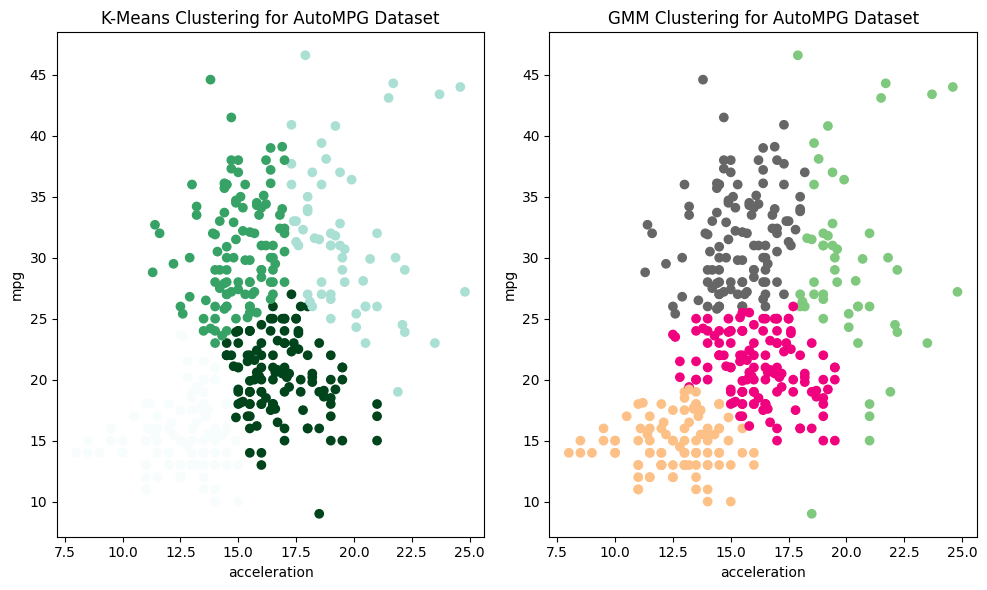

In [10]:
# Define the URL and column names for the AutoMPG dataset
mpg_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
mpg_names = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin", "car_name"]
mpg_data = pd.read_csv(mpg_url, delim_whitespace=True, names=mpg_names)

perform_clustering("AutoMPG Dataset", mpg_data, ["acceleration", "mpg"])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

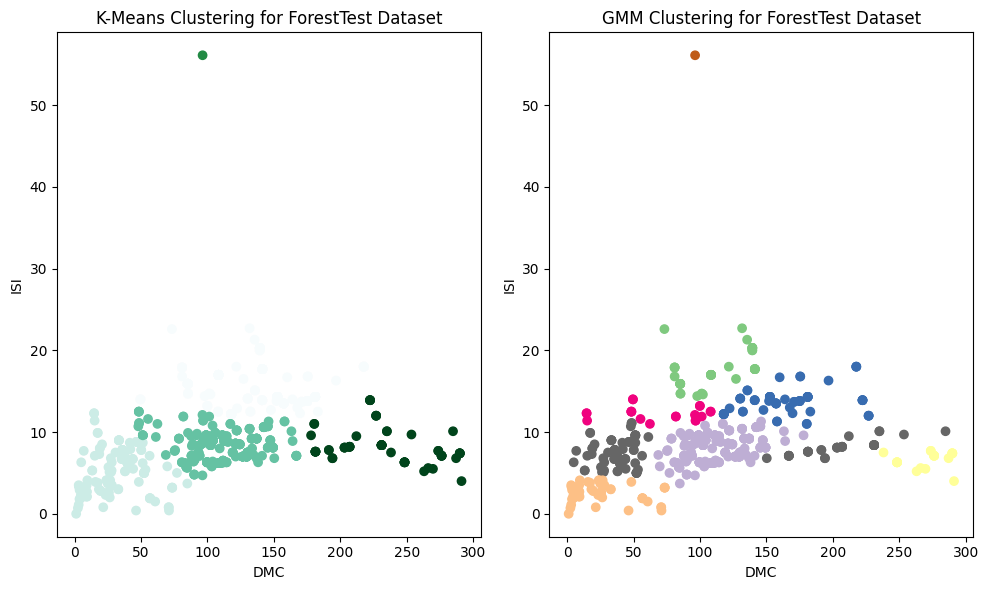

In [12]:
# K-Means and GMM clustering on Forest Test Dataset
forest_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv"
forest_data = pd.read_csv(forest_url)
perform_clustering("Forest Test Dataset", forest_data,[ "DMC", "ISI"] )

## OBservation:
The clusters identified by both K-Means and GMM algorithms suggest different levels of fire danger. For example, clusters with higher DMC and ISI values may indicate areas prone to more severe fires, while clusters with lower values may represent regions with lower fire risk. Further analysis, potentially incorporating additional features, would be necessary to validate these interpretations and derive actionable insights for forest fire prevention and management.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

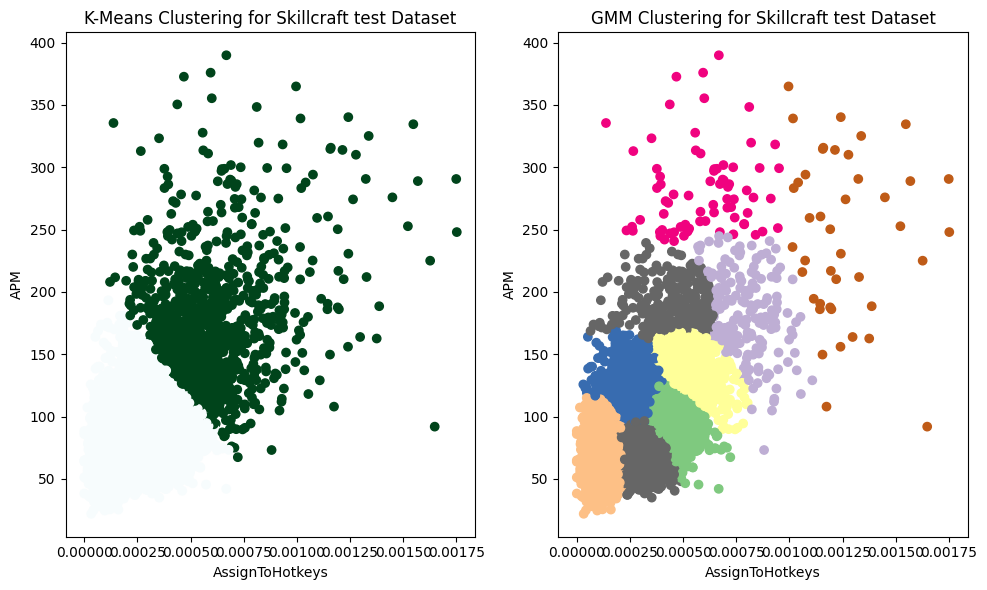

In [13]:
# K mean and GMM clusterinh on Skillcraft dataset
skillcraft1_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00272/SkillCraft1_Dataset.csv"
skillcraft1_data = pd.read_csv(skillcraft1_url)

perform_clustering("Skillcraft test Dataset", skillcraft1_data, ["AssignToHotkeys", "APM"])


## Observation:
Distinct clusters are observed in both K-means and GMM clustering plots for the Skillcraft dataset using 'AssignToHotkeys' and 'APM' features. K-means shows two well-defined clusters, while GMM displays softer boundaries between clusters. Outliers exist in both plots, but both algorithms effectively separate data points based on features.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

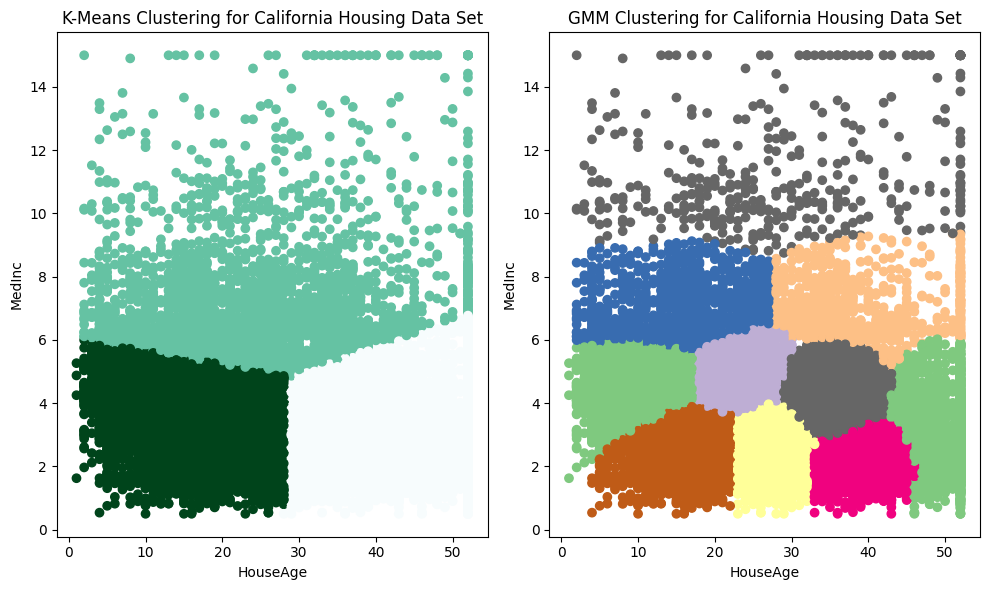

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

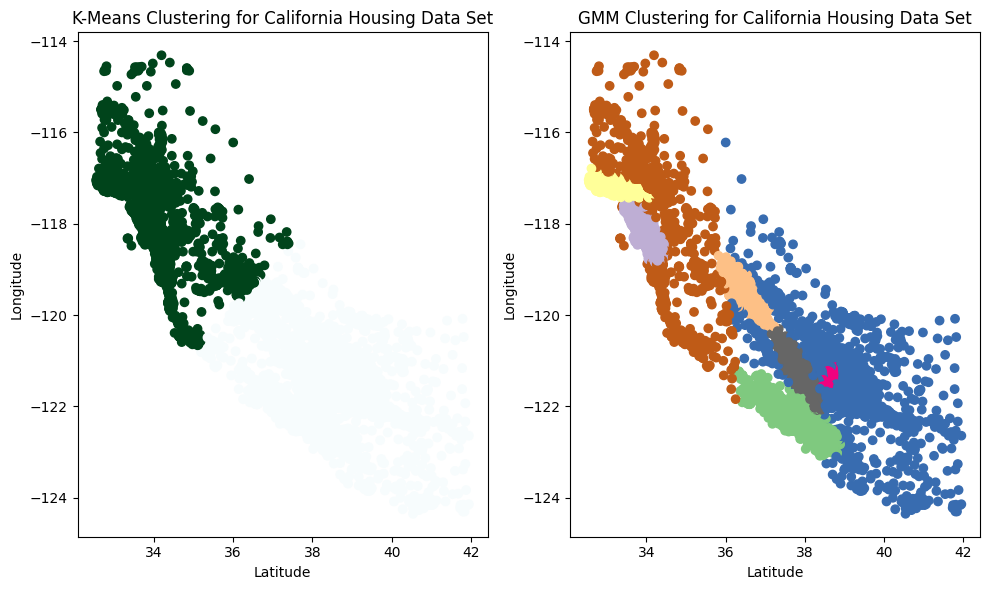

In [22]:
# K mean and GMM clustering on California Housing Dataset
california_housing_data = fetch_california_housing()
california_housing_df = pd.DataFrame(california_housing_data.data, columns=california_housing_data.feature_names)
perform_clustering("California Housing Data Set", california_housing_df, ["HouseAge", "MedInc"])

perform_clustering("California Housing Data Set", california_housing_df, ["Latitude", "Longitude"])

## Comment::
The California Housing Dataset is clustered using both K-means and Gaussian Mixture Model (GMM) clustering algorithms based on the features "HouseAge" and "MedInc".

In both clustering methods, we observe distinct groups of individuals with different income levels. This indicates that median income plays a significant role in determining the clusters, as individuals with similar income levels tend to be grouped together.

Interestingly, the arrangement of the groups along the feature axis for "HouseAge" doesn't seem to have a strong influence on the clustering outcome. This suggests that the age of the house might not be as crucial a factor in determining the clusters as median income.